In [1]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim

In [2]:
def Prior(p):
    return np.piecewise(p, [p>=0 and p<=1,p<0 and p>1],[lambda p:1.,lambda p:0.])
Prior = np.vectorize(Prior)

In [3]:
Prior(2.0)

array(0.)

In [4]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [5]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [6]:
p = np.linspace(0,1,1000)
r = 7
n = 10
Pos = Posterior(p,r,n)

In [7]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.0007575757575757576

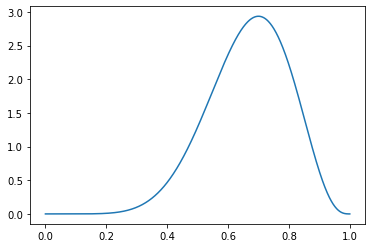

In [8]:
plt.plot(p,Pos/I)

In [9]:
index = np.where(np.amax(Pos)==Pos)
hatp = p[index][0]
hatp

0.6996996996996997

In [10]:
sigma = np.sqrt( hatp*(1-hatp)/n )
sigma

0.14495517580957562

In [11]:
def Metropolis(x0,Posterior,NSteps=int(5e4), delta=0.4):
    
    x = np.zeros((NSteps,1))
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n) # Present
        
        xf = x[i-1] + delta*2.*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n) # Future
        
        alpha = np.minimum(1,P1/P0)
        
        g = np.random.rand()
        
        if alpha > g:
            x[i] = xf
        else:
            x[i] = x[i-1]
            
            
    return x[100:,:]

In [12]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|███████████████████████████████████████████████████████| 49999/49999 [00:20<00:00, 2405.86it/s]


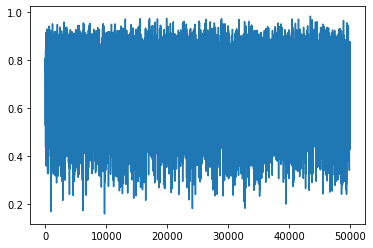

In [13]:
plt.plot(MCMC[:,0])

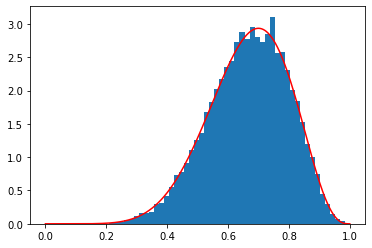

In [14]:
plt.hist(MCMC[:,0],bins=50,density=True);
plt.plot(p,Pos/I,color='r')

In [15]:
mean = np.percentile(MCMC, 50, axis=0)
mean

array([0.6759399])

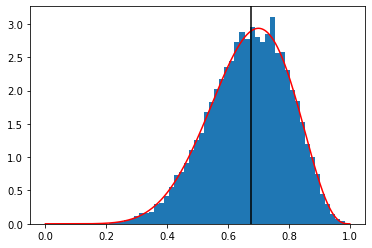

In [16]:
plt.hist(MCMC[:,0],bins=50,density=True);
plt.plot(p,Pos/I,color='r')
plt.axvline(x=mean,color='k')

In [17]:
q = np.quantile( MCMC[:,0], q = [0.16,0.84], axis=0)
q

array([0.533866  , 0.79996255])

In [18]:
errorinf = mean-q[0]
errorsup = q[1]-mean
print(errorsup,errorinf)

[0.12402265] [0.1420739]
